In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r'file_path')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes' : 1, 'No' : 0})

  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes' : 1, 'No' : 0})


In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [7]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [8]:
test = df['Previous Scores']

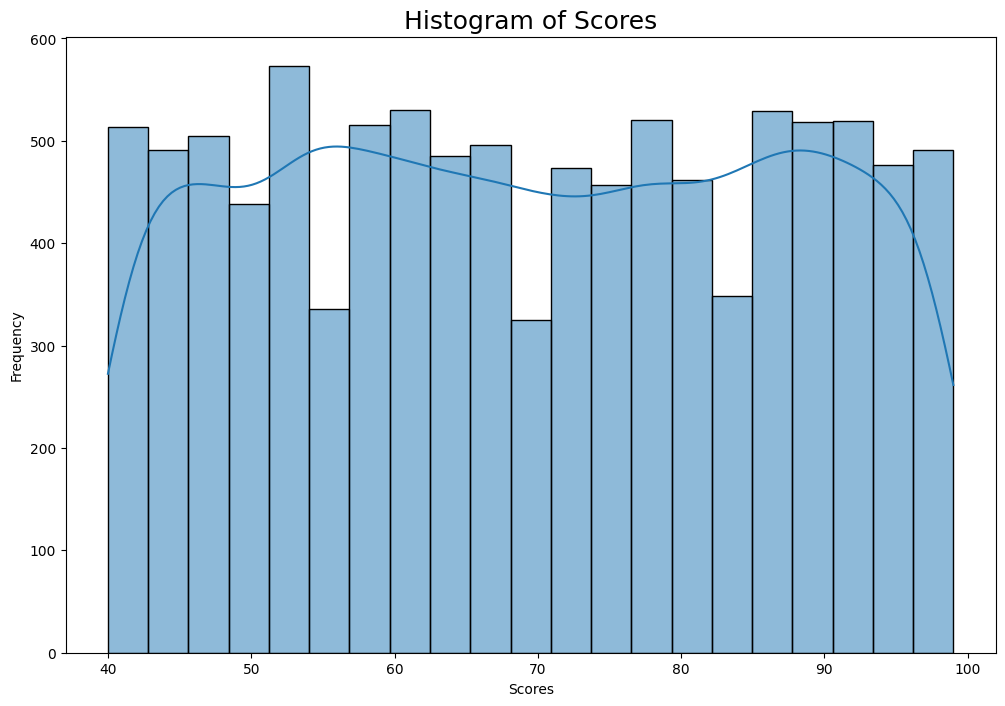

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x=test, kde=True)
plt.title('Histogram of Scores' , fontsize=18)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

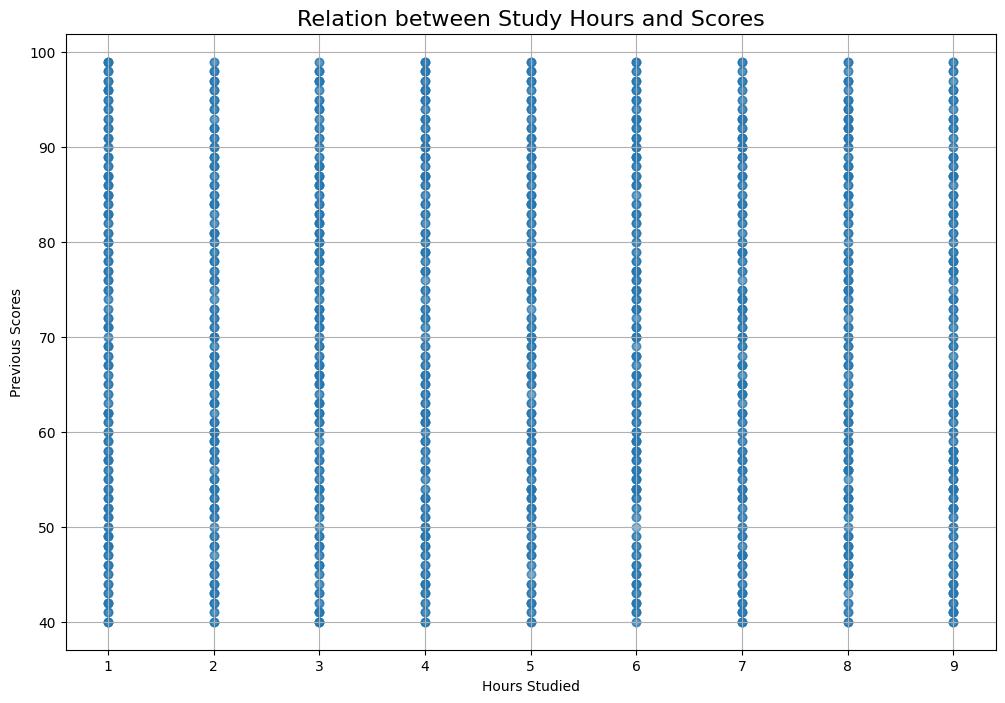

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(data=df, x='Hours Studied', y='Previous Scores' , alpha=0.1)
plt.title('Relation between Study Hours and Scores', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Previous Scores')
plt.grid(True)  # Optionally, add gridlines
plt.show()

In [12]:
df.to_csv(r'file_path')

<Axes: >

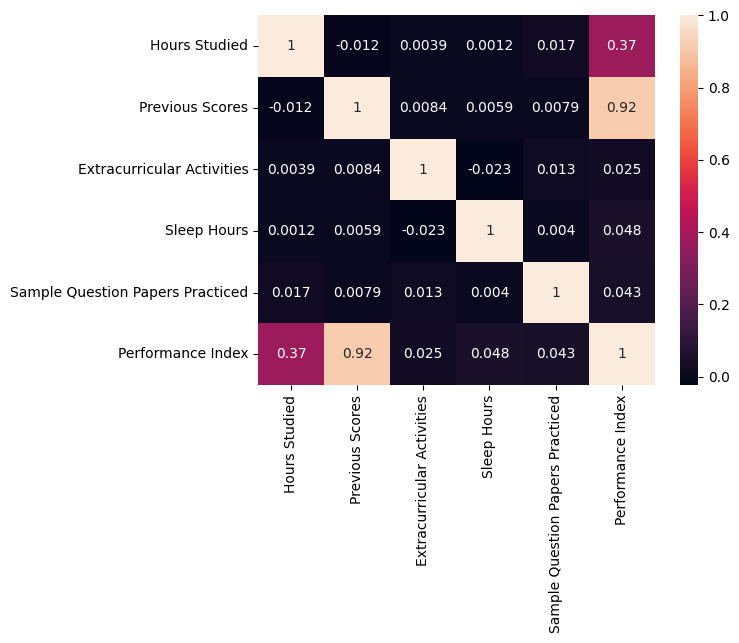

In [13]:
sns.heatmap(df.corr() , annot=True)

In [14]:
df.drop(columns=['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced','Performance Index'])        

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


In [15]:
test

0       99
1       82
2       51
3       52
4       75
        ..
9995    49
9996    64
9997    83
9998    97
9999    74
Name: Previous Scores, Length: 10000, dtype: int64

In [16]:
X_train,X_test,y_train,y_test=train_test_split(df,test,test_size=0.2,random_state=44)

In [17]:
scaler=StandardScaler()
scaler.fit(df)
df=scaler.transform(df)
df

array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394,
         1.86216688],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215,
         0.50881766],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215,
        -0.5322202 ],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ,
         0.9772847 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572,
         2.07037446],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394,
         0.45676577]])

In [18]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
mse 

4.782895222791203e-28

In [21]:
acc=r2_score(y_test,y_pred)
acc = acc * 100 
print("The accuracy= ",acc,'%')

The accuracy=  100.0 %


In [22]:
print(model.coef_)
print('--------------------------------')
print(model.intercept_)

[ 2.42131372e-16  1.00000000e+00 -8.70367258e-16  4.67326456e-17
 -1.24098808e-16 -1.20136225e-16]
--------------------------------
0.0


Text(0.5, 1.0, 'Actual vs Predicted')

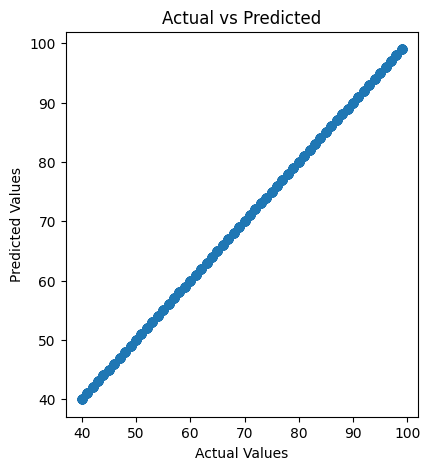

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Residuals vs Predicted')

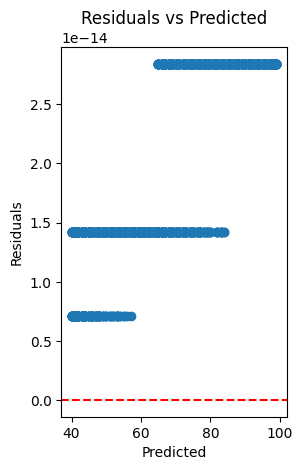

In [26]:
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')